# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [65]:
# from src.call import call_on_students

In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [67]:
# call_on_students(1)

In [68]:
# Code here
z_eight = (8 - 6) / 2

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [70]:
# call_on_students(1)

In [71]:
# Code here
over_eight = 1 - stats.norm.cdf(z_eight)

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [74]:
# call_on_students(1)

In [83]:
# Code here
sample_size = 7
sample_mean = 5
sample_std = .5
se = (sample_std / np.sqrt(sample_size))
z = stats.t.ppf(.975, df=6)
conf_interval = (sample_mean - z*se, sample_mean + z*se)
stats.t.interval(alpha = .95, loc=5, scale=se, df=6)

(4.53757712628571, 5.46242287371429)

In [79]:
conf_interval

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- Under the assumption that the sample comes from the population, we can deduce with 95% confidence that the population mean lies between (4.6296016227331265, 5.3703983772668735)


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [ ]:
# call_on_students(1)

In [14]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [17]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [21]:
# Describe the data
df.describe(percentiles=[.05,.25,.5,.75,.95])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
5%,13.000000,4.000000,85.000000,60.550000,1931.600000,11.255000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
95%,37.000000,8.000000,400.000000,180.000000,4464.000000,20.235000,82.000000,3.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


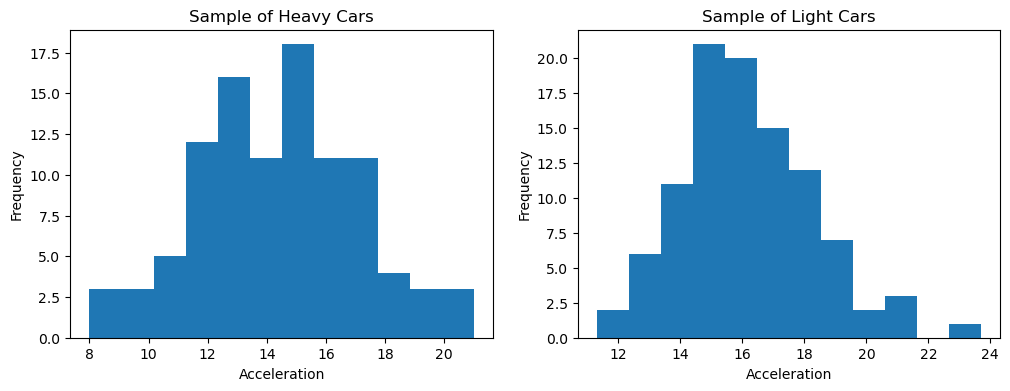

In [22]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- H_null : light cars' accelerations have similar distribution parameters as heavy cars' accelerations


**Alternative hypothesis:**

- H_alt : light cars' accelerations have larger distribution parameters than heavy cars' accelerations


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- Type 1 error would occur if we incorrectly reject the null hypothesis that they have similar distribution parameters, when that was indeed the case


**Type II Error:**

- Type 2 error would occur if we incorrectly fail to reject the null hypothesis, when light cars indeed had higher acceleration distribution parameters



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- we will run a single tailed t-test with alpha = .05


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [85]:
# Code here
stats.ttest_ind(heavy_cars['acceleration'],light_cars['acceleration'], alternative='less', random_state=42)

Ttest_indResult(statistic=-5.00874014469676, pvalue=6.048220334084493e-07)

### 8c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- Yes! With p_value ~= 0 < .05, we can reject H_null


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [ ]:
# call_on_students(1)

In [86]:
P_BA = .75
P_A = .6
P_B = .6*.75 + .4*.05
(P_BA*P_A) / P_B

0.9574468085106382

**1. Which probability are we trying to find?**

   - P(alignment = Democrat | vote = No), conditional probability that this congressman is a democrat given that he voted no.
   
    
**2. Based on that, what other pieces do we need?**

   - We need the probability someone voted no given they were a Democrat P(vote = no | alignment = Democrat), the probability that a congressman is a Democrat P(alignment = Democrat), and the probability that a congressman would vote no P(vote = No)
    
    
**3. Result?**

   - (P_BA * P_A) / P_B = (.75*.6) / (.6*.75 + .4*.05) = 0.6923076923076923
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [43]:
import seaborn as sns

In [ ]:
# call_on_students(1)

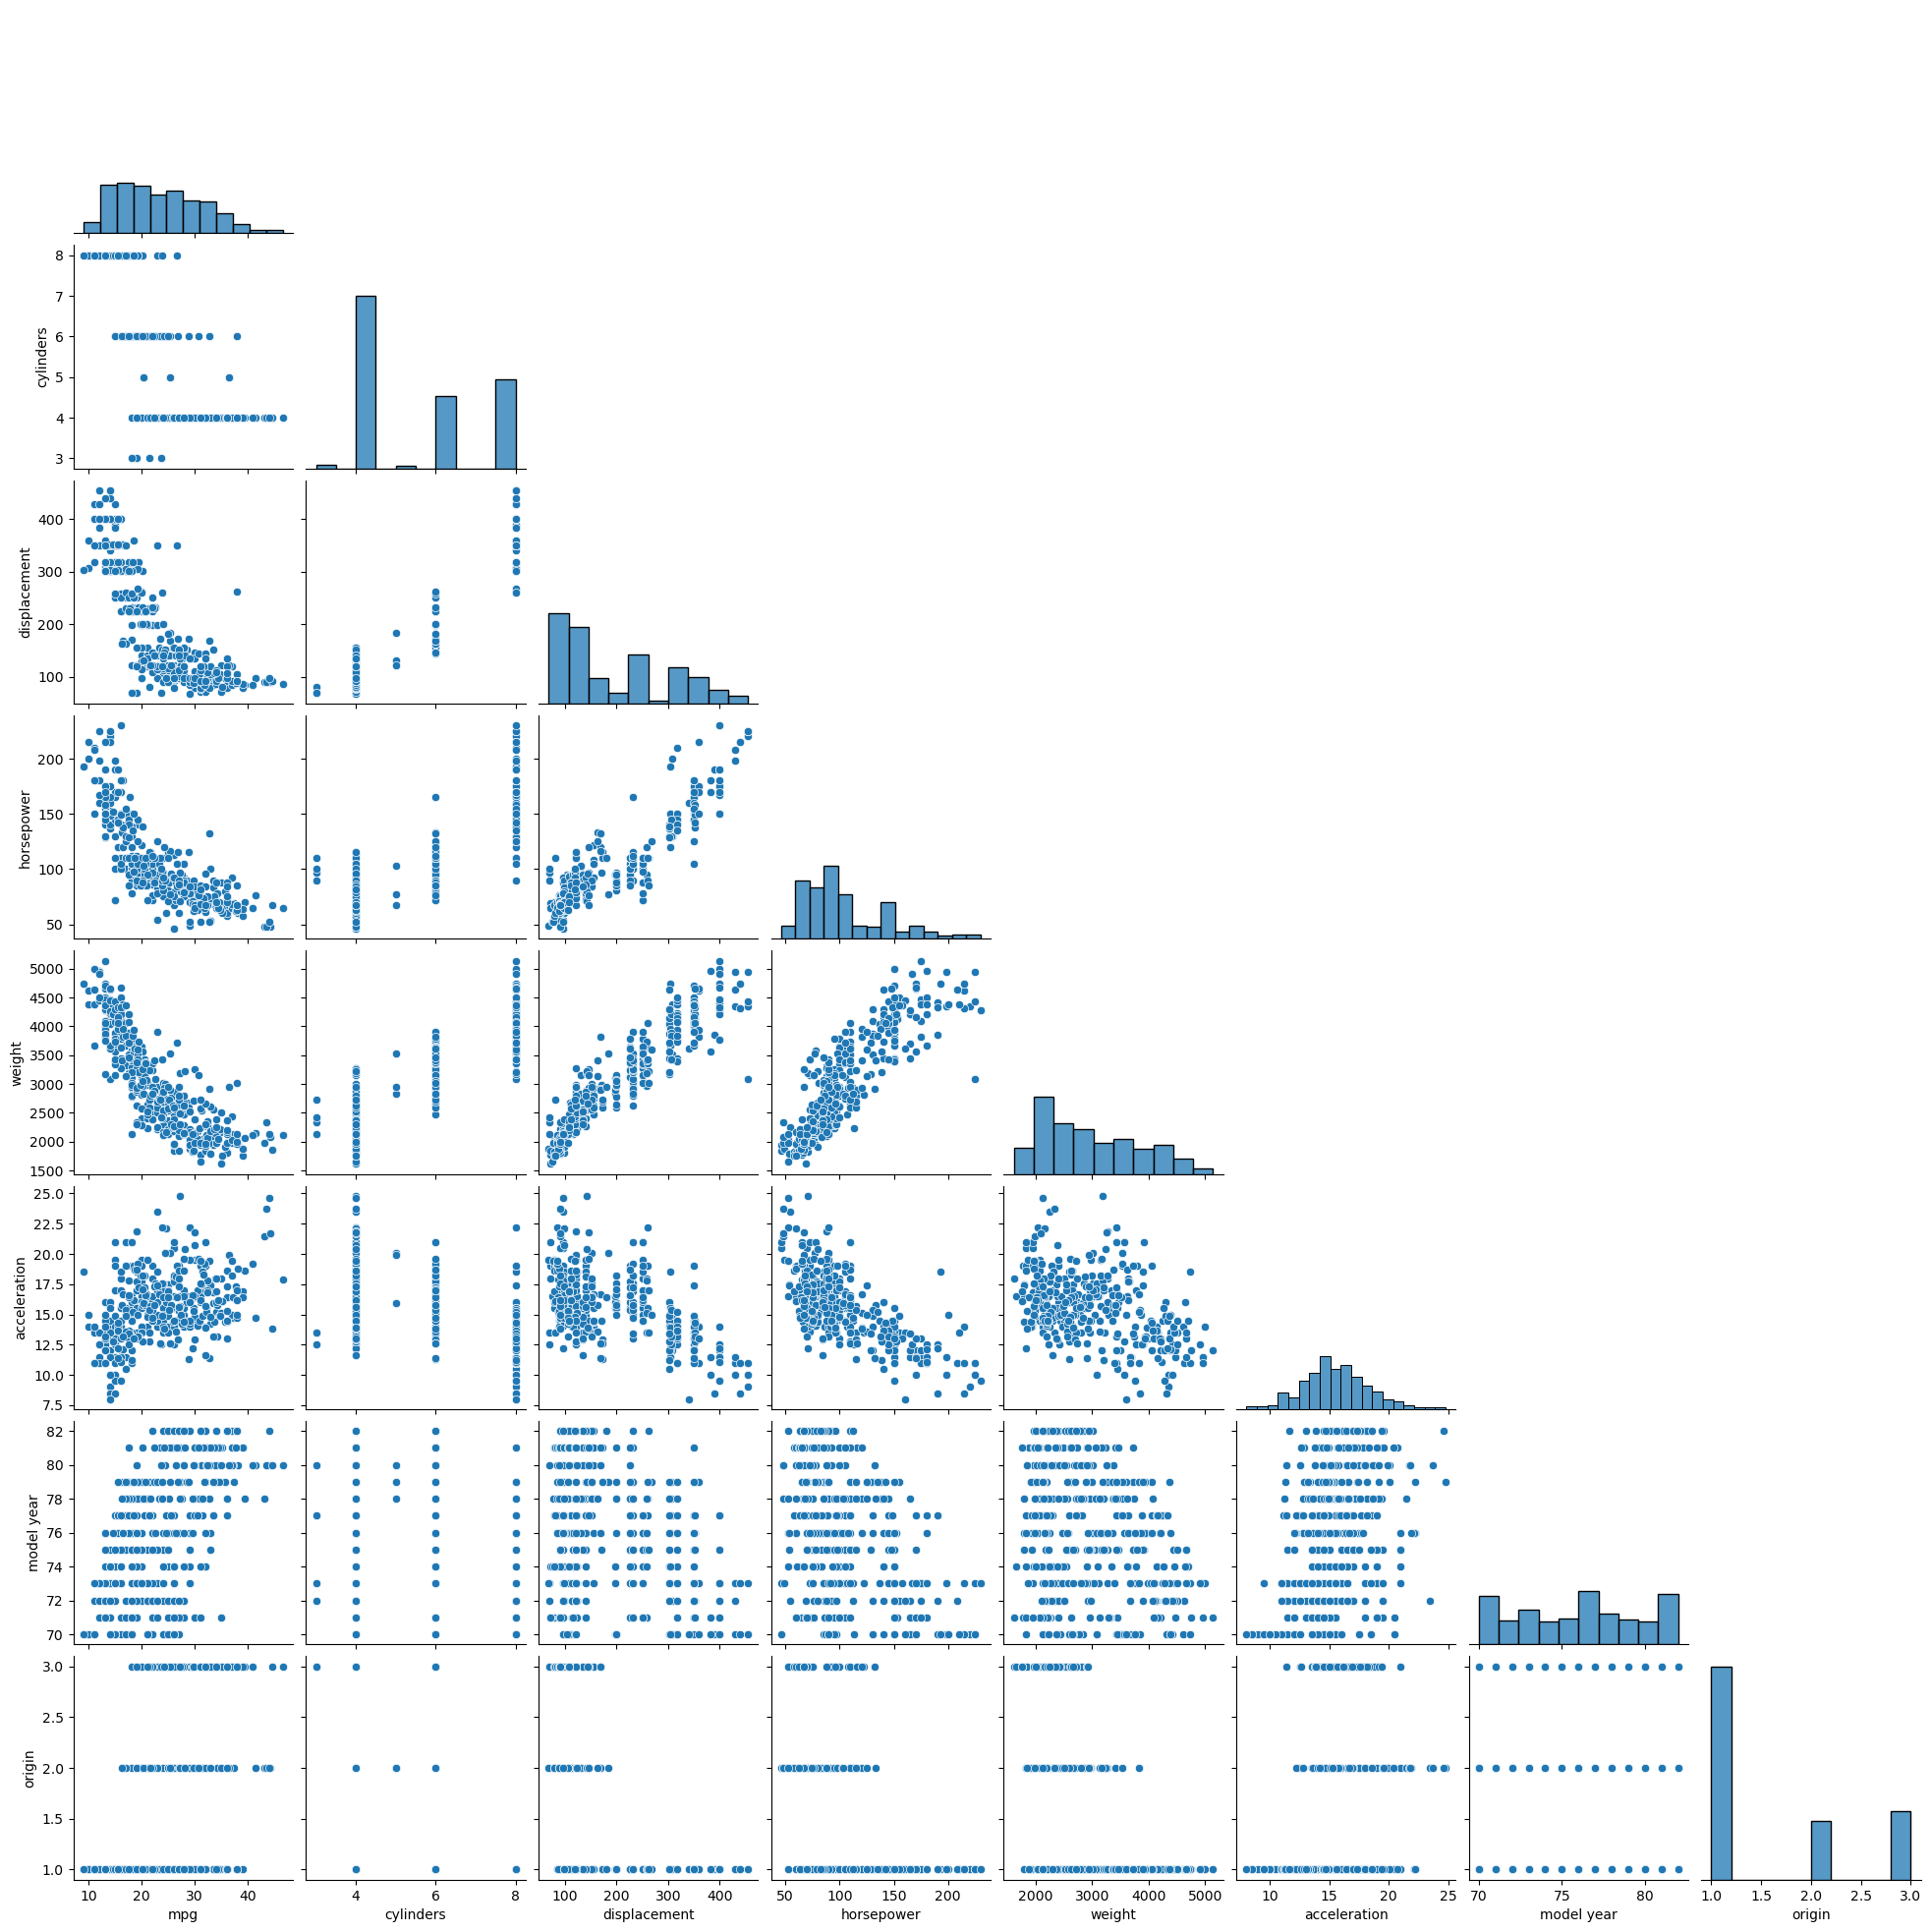

In [45]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df, corner=True)
plt.show()

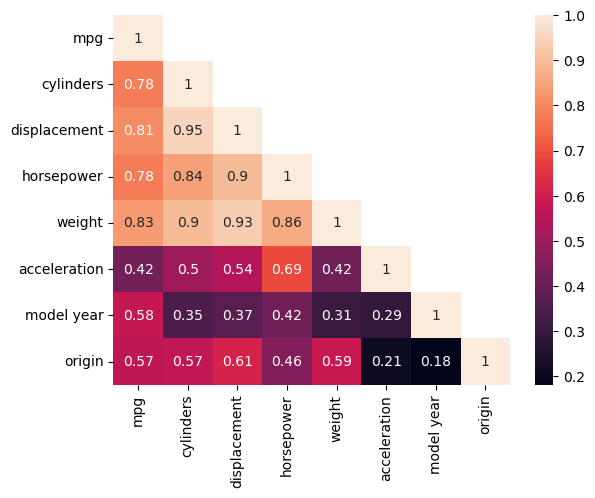

In [100]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
c = df.corr().abs()
mask = np.triu(np.ones_like(c).astype(bool), k=1)
sns.heatmap(c, annot=True, mask=mask);

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [ ]:
# call_on_students(1)

**Observations:**

- MPG has:
 - high Negative correlation with weight, horsepower, displacement, cylinders (cylinders seems to be ordinal categorical)
 - Positive correlation with acceleration, model year and origin (origin seems to be ordinal categorical)
 - All features have high colinearity aside from acceleration, model year and origin (between each other)


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [101]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [102]:
# call_on_students(1)

In [103]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!
X = df[['weight']]
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

simple_model = sm.OLS(endog = y_train, exog = sm.add_constant(X_train)).fit()

In [104]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     706.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           4.99e-82
Time:                        16:21:39   Log-Likelihood:                -903.52
No. Observations:                 313   AIC:                             1811.
Df Residuals:                     311   BIC:                             1819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.1459      0.890     51.823      0.000      44.394      47.898
weight        -0.0076      0.000    -26.577      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       42.872   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.032
Skew:                           0.825   Prob(JB):                     1.69e-15
Kurtosis:                       4.579   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [ ]:
# call_on_students(1)

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

from our statistically significant model we observe that:
- a negative change in weight of 1 (weight units) will increase mpg by .0078 
- if the car had a hypothetical 0 weight, the mpg of that car would be 46.7


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [62]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# call_on_students(1)

In [63]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
X = df[['weight','cylinders','displacement','horsepower', 'acceleration']]
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

model = sm.OLS(endog = y_train, exog = sm.add_constant(X_train)).fit()


In [64]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.41e-82
Time:                        12:03:58   Log-Likelihood:                -882.32
No. Observations:                 313   AIC:                             1777.
Df Residuals:                     307   BIC:                             1799.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.8839      2.880     16.973      0.000      43.217      54.551
weight          -0.0049      0.001     -5.093      0.000      -0.007      -0.003
cylinders       -0.4248      0.457     -0.930      0.353      -1.323       0.474
displacement     0.0024      0.010      0.241      0.809      -0.017       0.022
horsepower      -0.0609      0.019     -3.228      0.001      -0.098      -0.024
acceleration    -0.1785      0.141     -1.263      0.208      -0.457       0.100
==============================================================================
Omnibus:                       29.584   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.592
Skew:                           0.638   Prob(JB):                     5.64e-10
Kurtosis:                       4.279   Cond. No.                     3.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [ ]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- Slightly higher R2
